# <font color=white><center><b>DATA ANALYSIS AND VISUALIZATION OF </center><br><center>120 years of Olympic history</b></center></font>

[Data in Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

# Import the libraries

In [2]:
import numpy as np
import pandas as pd
import warnings 

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#default theme and settings
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

# Read the data

In [3]:
df = pd.read_csv("athlete_events.csv")

In [3]:
df.shape

(271116, 15)

In [4]:
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


## Data Cleaning

### Duplicated Raws

In [4]:
df.duplicated().sum()

1385

In [5]:
df = df.drop_duplicates()

### Find the missing data in each column

In [9]:
print('Number of missing values in each column:\n', df.isnull().sum().sort_values(ascending=False), "\n\n",
      'Percentage of missing values in each column:\n', df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100)

Number of missing values in each column:
 Medal     229959
Weight     61527
Height     58814
Age         9315
ID             0
Name           0
Sex            0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
dtype: int64 

 Percentage of missing values in each column:
 Medal     85.254939
Weight    22.810504
Height    21.804687
Age        3.453441
ID         0.000000
Name       0.000000
Sex        0.000000
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
dtype: float64


In data description, the Null values in `Medal` column mean the athlete did not win a medal, so they are not a problem, but we have to deal with missing values in `Weight` and `Height` columns
In `Weight` and `Height` the values are float, so we need to know the distribution of these columns 

## Q-Q Plot for Weight

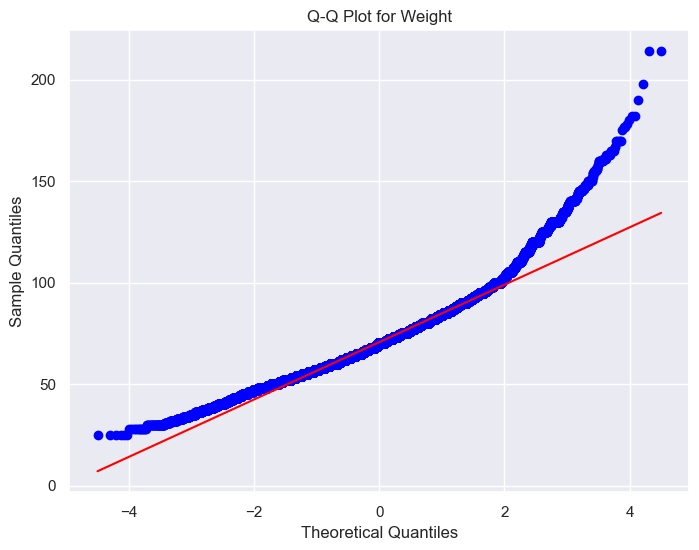

In [10]:
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(df['Weight'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot for Weight')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

### Result Interpretation:
- The Q-Q plot for the `Weight` column shows significant deviation from the normal distribution, especially in the upper tail.
- The data is skewed with outliers present at the higher values.
- Best way to handle missing values: Replace with the **median**, as it is less sensitive to outliers.

## Q-Q Plot for Height

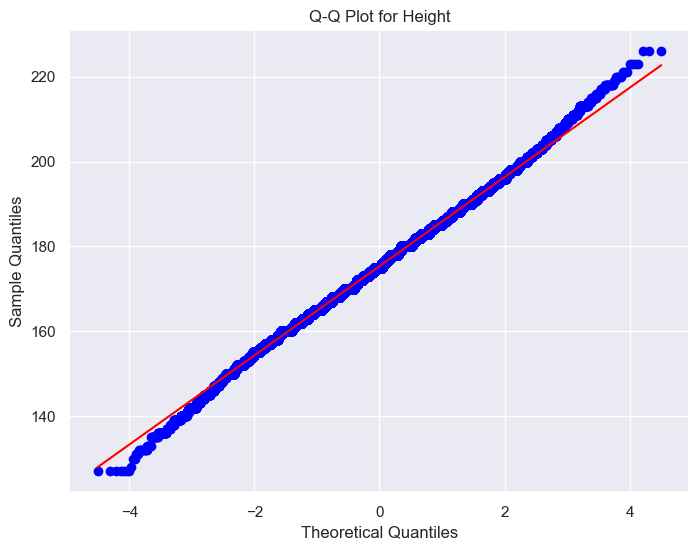

In [11]:
plt.figure(figsize=(8, 6))
stats.probplot(df['Height'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot for Height')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

### Result Interpretation:
- The Q-Q plot for the `Height` column shows that the data is closely aligned with the normal distribution.
- There is minor deviation at the high values, but overall the data can be considered normally distributed.
- Best way to handle missing values: Replace with the **mean**, as the distribution is approximately normal.

## Q-Q Plot for Age

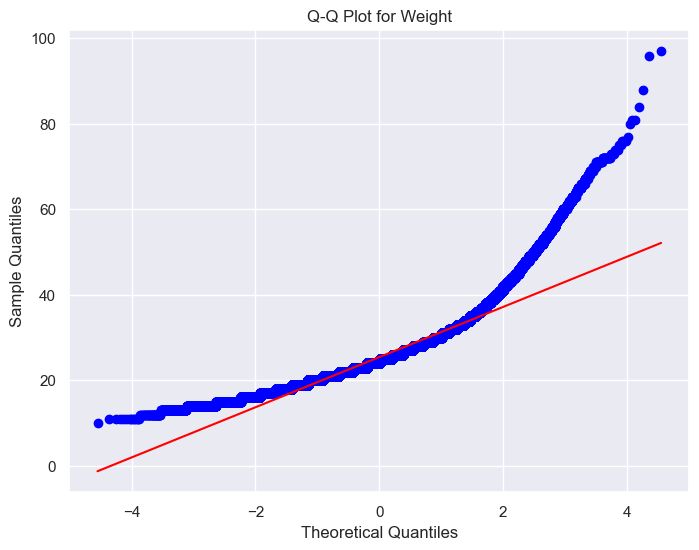

In [12]:
plt.figure(figsize=(8, 6))
stats.probplot(df['Age'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot for Weight')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

### Result Interpretation:
- The Q-Q plot for the `Age` column shows significant deviation from the normal distribution, especially in the upper tail.
- The data is skewed with outliers present at the higher values.
- Best way to handle missing values: Replace with the **median**, as it is less sensitive to outliers.

### Replace the missing values

In [6]:
df['Weight'].fillna(df['Weight'].median(), inplace=True)
df['Height'].fillna(df['Height'].mean(), inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Data Analysis

## Athlete participated the most (his/her name and ID)

In [14]:
most_participated_athlete_name = df['Name'].value_counts().idxmax()
most_participated_athlete_name

'Heikki Ilmari Savolainen'

In [15]:
most_participated_athlete_id = df.ID[df['Name'] == most_participated_athlete_name].unique()
most_participated_athlete_id

array([106296], dtype=int64)

## Number of cities we have and what are they

In [16]:
cities = df['City'].unique()
cities

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
       'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
       'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
       'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
       'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
       'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

In [17]:
num_of_cities = cities.shape[0]
num_of_cities

42

## Which countries have won the most medals in the last 30 years?

In [18]:
last_30_years_df = df[df['Year'] > df['Year'].max() - 30]

In [19]:
countries_most_medals = last_30_years_df.groupby(['NOC', 'Medal']).size().unstack()

In [20]:
countries_most_medals['number_of_medals'] = countries_most_medals['Gold'] + countries_most_medals['Silver'] + countries_most_medals['Bronze']
countries_most_medals.drop(['Gold', 'Silver', 'Bronze'], axis=1, inplace=True)
countries_most_medals.sort_values(by='number_of_medals', axis=0, ascending=False, inplace=True)

In [21]:
countries_most_medals.iloc[:3]

Medal,number_of_medals
NOC,
USA,2395.0
GER,1268.0
RUS,1148.0


## Sport with the highest number of participants in the Summer Olympics vs. the Winter Olympics

In [7]:
summer_df = df[df['Season'] == 'Summer']
winter_df = df[df['Season'] == 'Winter']

In [8]:
most_summer_sport_participation = summer_df['Sport'].value_counts().idxmax()
most_summer_sport_participation

'Athletics'

In [9]:
most_winter_sport_participation = winter_df['Sport'].value_counts().idxmax()
most_winter_sport_participation

'Cross Country Skiing'

### How many cities do we have and what are they ?

In [14]:
print(df1['City'].nunique())
df1['City'].unique()

42


array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
       'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
       'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
       'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
       'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
       'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

### Find the number of athlete for each year and plot them

In [15]:
number_of_athlete_each_year = df1.groupby('Year')['Name'].count()
number_of_athlete_each_year

Year
1896      380
1900     1898
1904     1301
1906     1733
1908     3069
1912     4040
1920     4292
1924     5570
1928     5238
1932     2817
1936     7146
1948     7383
1952     9358
1956     6434
1960     9235
1964     9480
1968    10479
1972    11959
1976    10502
1980     8937
1984    11588
1988    14676
1992    16413
1994     3160
1996    13780
1998     3605
2000    13821
2002     4109
2004    13443
2006     4382
2008    13602
2010     4402
2012    12920
2014     4891
2016    13688
Name: Name, dtype: int64

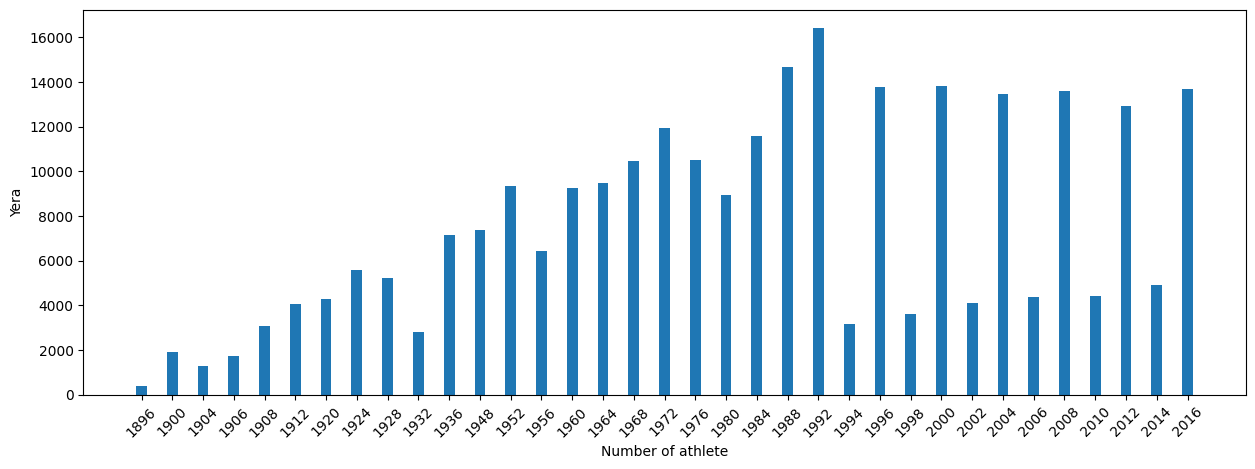

In [11]:
plt.figure(figsize=(15,5))
plt.bar(range(len(number_of_athlete_each_year)) , number_of_athlete_each_year.values,width = 0.35)
plt.xticks(range(len(number_of_athlete_each_year)),number_of_athlete_each_year.index,rotation=45)
plt.xlabel('Number of athlete')
plt.ylabel('Yera')
plt.show()

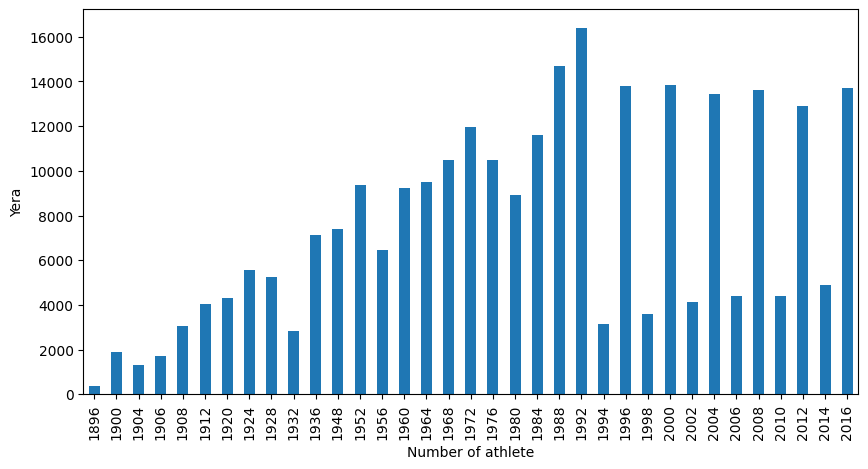

In [12]:
number_of_athlete_each_year.plot(kind = 'bar',figsize=(10,5))
plt.xlabel('Number of athlete')
plt.ylabel('Yera')
plt.show()

### Which athlete participated the most? (his/her name and ID)


In [13]:
print(df1['Name'].mode()[0])
athlete_participated_most = df1['Name'].value_counts().idxmax()
athlete_participated_most

Heikki Ilmari Savolainen


'Heikki Ilmari Savolainen'

In [14]:
ID = df1.ID[df1['Name'] == athlete_participated_most].unique()[0]
ID

106296

### Find the number of each medal for each year.

In [15]:
number_of_each_medal_each_year = df1.groupby(['Year','Medal']).size().unstack(level=1)
number_of_each_medal_each_year.columns = ['N_Bronze','N_Gold','N_Silver']
number_of_each_medal_each_year

,N_Bronze,N_Gold,N_Silver
Year,,,
1896,38,62,43
1900,175,198,220
1904,150,173,163
1906,145,157,156
1908,256,294,281
1912,300,326,315
1920,367,493,448
1924,311,332,319
1928,281,275,267


### plot the previous table

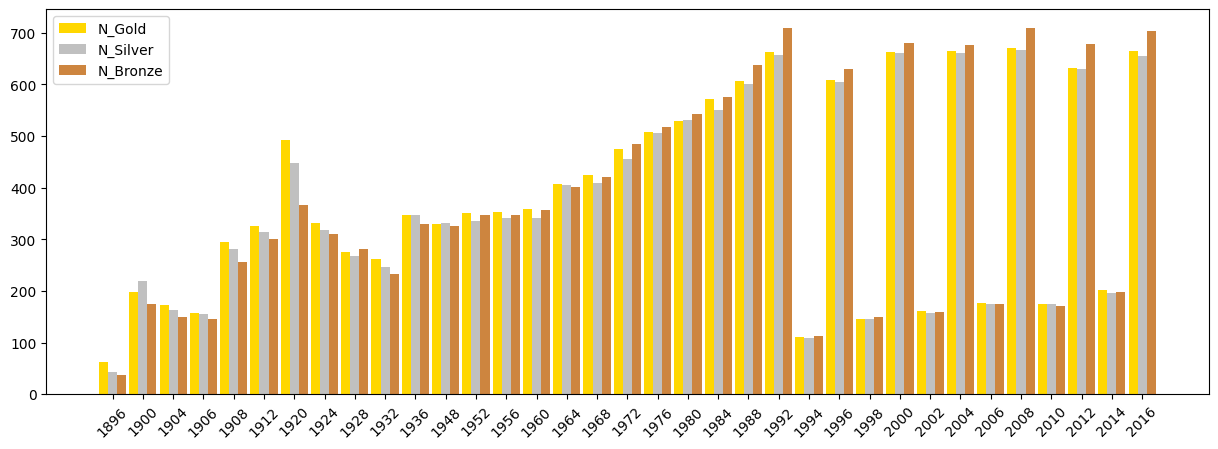

In [16]:
width = 0.3
positions = np.arange(len(number_of_each_medal_each_year))
plt.figure(figsize=(15,5))
plt.bar(positions-width,number_of_each_medal_each_year['N_Gold'],label='N_Gold',width=0.3,color='gold')
plt.bar(positions,number_of_each_medal_each_year['N_Silver'],label='N_Silver',width=0.3,color='silver')
plt.bar(positions+width,number_of_each_medal_each_year['N_Bronze'],label='N_Bronze',width=0.3,color='peru')
plt.xticks(positions,number_of_each_medal_each_year.index,rotation=45)
plt.legend()
plt.show()

### Find the number of winners with the gold medal in each city?

In [17]:
gold = df1[df1['Medal'] == 'Gold']
gold_medal_in_each_city = gold.groupby('City')['Medal'].count()
gold_medal_in_each_city

City
Albertville                104
Amsterdam                  245
Antwerpen                  493
Athina                     883
Atlanta                    608
Barcelona                  559
Beijing                    671
Berlin                     312
Calgary                     87
Chamonix                    55
Cortina d'Ampezzo           51
Garmisch-Partenkirchen      36
Grenoble                    66
Helsinki                   306
Innsbruck                  131
Lake Placid                104
Lillehammer                110
London                    1215
Los Angeles                726
Melbourne                  290
Mexico City                359
Montreal                   438
Moskva                     457
Munich                     404
Nagano                     145
Oslo                        45
Paris                      475
Rio de Janeiro             665
Roma                       309
Salt Lake City             162
Sankt Moritz                71
Sapporo                     70
Sar

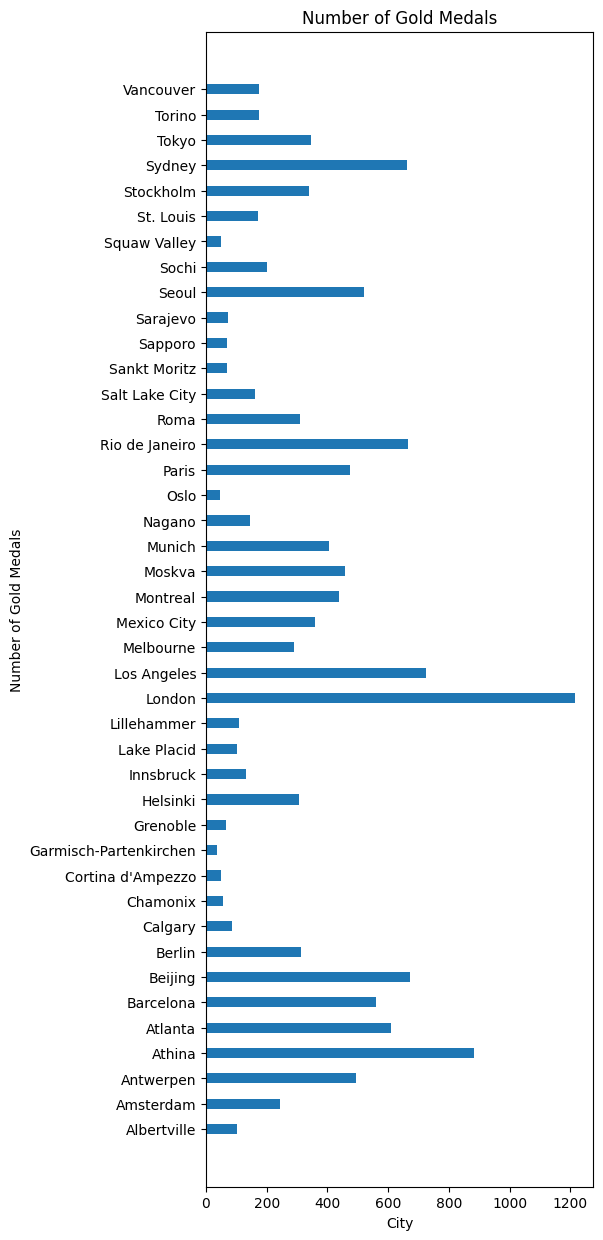

In [18]:
plt.figure(figsize = (5,15))
plt.barh(gold_medal_in_each_city.index,gold_medal_in_each_city.values,height=0.4)
plt.title('Number of Gold Medals')
plt.xlabel('City')
plt.ylabel('Number of Gold Medals')
plt.yticks(gold_medal_in_each_city.index)
plt.show()

## Find the total missing data for each year?

In [19]:
total_missing_data_for_each_year = df1.isnull().sum(axis=1).groupby(df1['Year']).sum()
total_missing_data_for_each_year

Year
1896     1065
1900     5676
1904     3331
1906     5022
1908     8057
1912    10018
1920    11175
1924    15194
1928    14124
1932     6308
1936    18433
1948    20008
1952    22943
1956    13531
1960    10407
1964     9710
1968     9663
1972    11331
1976    10819
1980     8706
1984    11307
1988    14802
1992    20759
1994     3207
1996    15638
1998     3337
2000    12067
2002     3707
2004    11515
2006     3878
2008    11866
2010     3908
2012    11507
2014     4532
2016    12064
dtype: int64

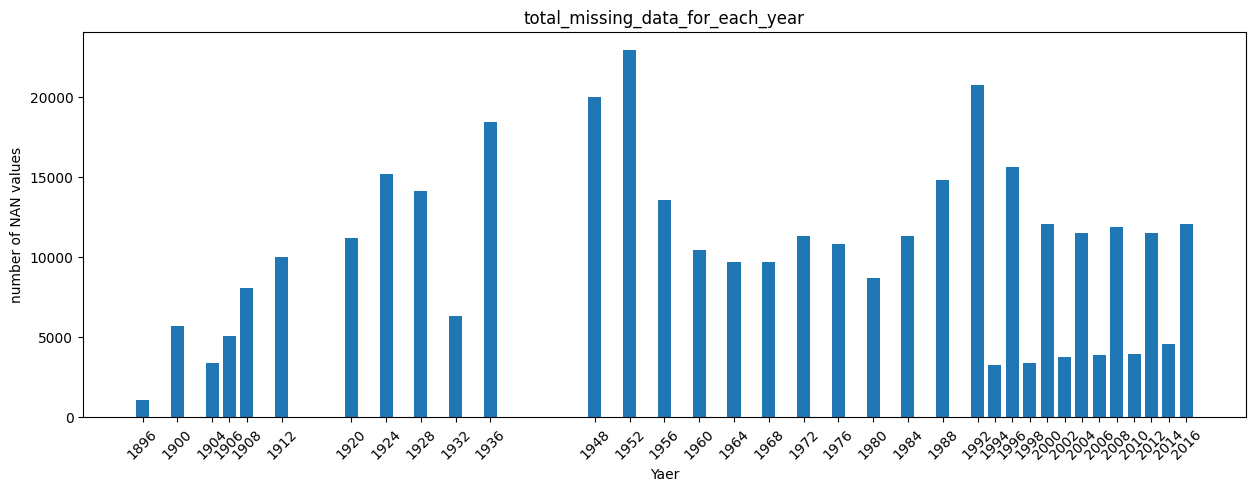

In [20]:
plt.figure(figsize = (15,5))
plt.bar(total_missing_data_for_each_year.index,total_missing_data_for_each_year.values,width = 1.5)
plt.title('total_missing_data_for_each_year')
plt.xlabel('Yaer')
plt.ylabel('number of NAN values')
plt.xticks(total_missing_data_for_each_year.index, rotation=45)
plt.show()

## Dont use for loops.

## Has the number of athletes changed over time for Summer and Winter?

In [21]:
summer = df1[df1['Season'] == 'Summer']
winter = df1[df1['Season'] == 'Winter']
number_of_athletes_Summer = summer.groupby('Year')['ID'].sum()
number_of_athletes_Winter = winter.groupby('Year')['ID'].sum()
print(number_of_athletes_Summer)
print(number_of_athletes_Winter)

Year
1896     27017908
1900    120530311
1904     91406086
1906    122516956
1908    203659794
1912    272546992
1920    287525514
1924    345968393
1928    321514319
1932    162627541
1936    433187229
1948    422072768
1952    568203944
1956    356477629
1960    541469925
1964    523862459
1968    575188949
1972    698977939
1976    582131346
1980    485978264
1984    630425672
1988    809168264
1992    883246525
1996    944557694
2000    952897502
2004    929502336
2008    938078934
2012    879572397
2016    932772923
Name: ID, dtype: int64
Year
1924     31756190
1928     39503516
1932     24232372
1936     60731094
1948     69052766
1952     70899521
1956     85654293
1960     76825618
1964    123697963
1968    130534693
1972    113025789
1976    128873295
1980    120284574
1984    149500343
1988    183185016
1992    237803565
1994    221835692
1998    253771898
2002    288308242
2006    304663705
2010    313330105
2014    342616355
Name: ID, dtype: int64


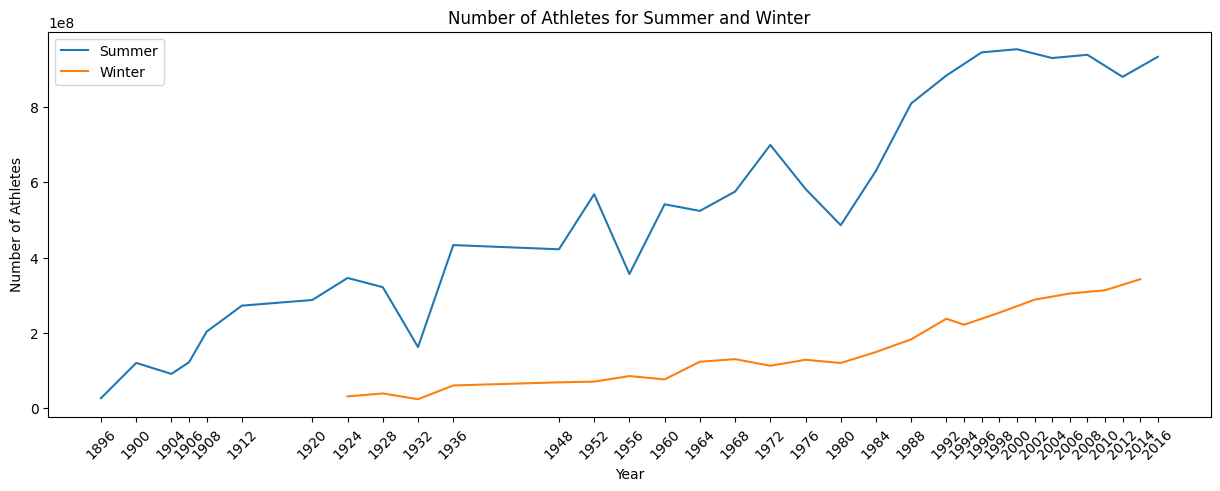

In [22]:
plt.figure(figsize=(15,5))
plt.plot(number_of_athletes_Summer.index,number_of_athletes_Summer.values,label='Summer')
plt.plot(number_of_athletes_Winter.index,number_of_athletes_Winter.values,label='Winter')
plt.title('Number of Athletes for Summer and Winter')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.xticks(number_of_athletes_Summer.index.union(number_of_athletes_Winter.index), rotation=45)
plt.legend()
plt.show()

## How has the participation of male vs. female athletes changed over the years? (You can use a line plot)

In [23]:
male = df1[df1['Sex'] == 'M']
female = df1[df1['Sex'] == 'F']
number_of_m = male.groupby('Year')['ID'].sum()
number_of_f = female.groupby('Year')['ID'].sum()
print(number_of_m)
print(number_of_f)

Year
1896     27017908
1900    118786399
1904     89932310
1906    121634020
1908    200371446
1912    267612725
1920    279260562
1924    360944245
1928    330829464
1932    168457677
1936    458314883
1948    440552981
1952    518792975
1956    363958810
1960    496461456
1964    527371555
1968    558302895
1972    634016974
1976    531715281
1980    457518762
1984    574066324
1988    700568043
1992    754896603
1994    141711736
1996    591617650
1998    151216508
2000    572385922
2002    171651146
2004    535718795
2006    178909712
2008    530290040
2010    179926897
2012    478804750
2014    198234678
2016    498266785
Name: ID, dtype: int64
Year
1900      1743912
1904      1473776
1906       882936
1908      3288348
1912      4934267
1920      8264952
1924     16780338
1928     30188371
1932     18402236
1936     35603440
1948     50572553
1952    120310490
1956     78173112
1960    121834087
1964    120188867
1968    147420747
1972    177986754
1976    179289360
1980    14874

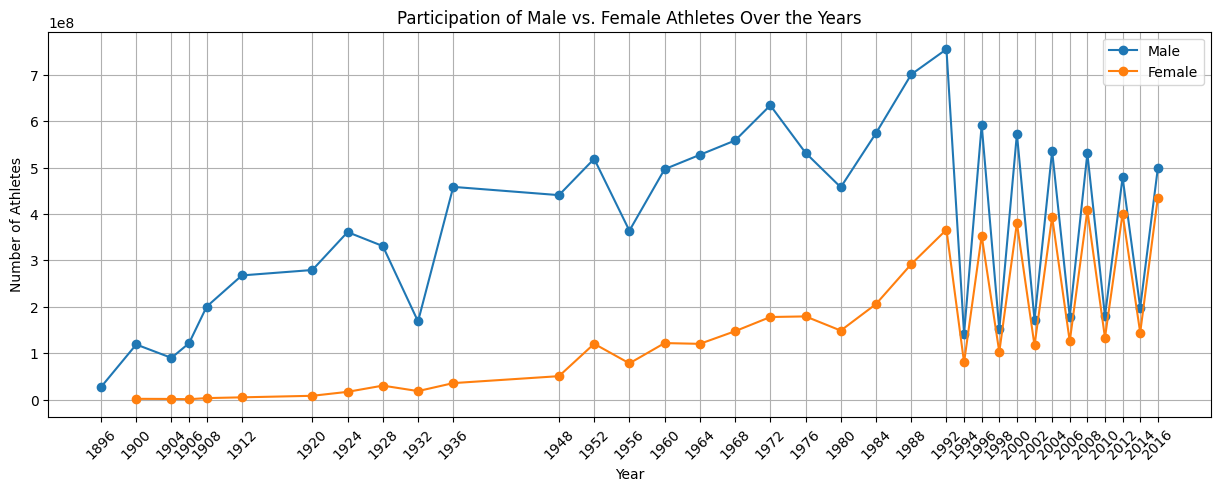

In [24]:
plt.figure(figsize=(15,5))
plt.plot(number_of_m.index,number_of_m.values,label='Male',marker = 'o')
plt.plot(number_of_f.index,number_of_f.values,label='Female',marker = 'o')
plt.title('Participation of Male vs. Female Athletes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.xticks(number_of_m.index.union(number_of_f.index), rotation=45)
plt.legend()
plt.grid(True)
plt.show()